In [11]:
from modeling.data_handling.data_loading import league_data_loader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [17]:
train_df = league_data_loader(range(2010, 2015))

100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


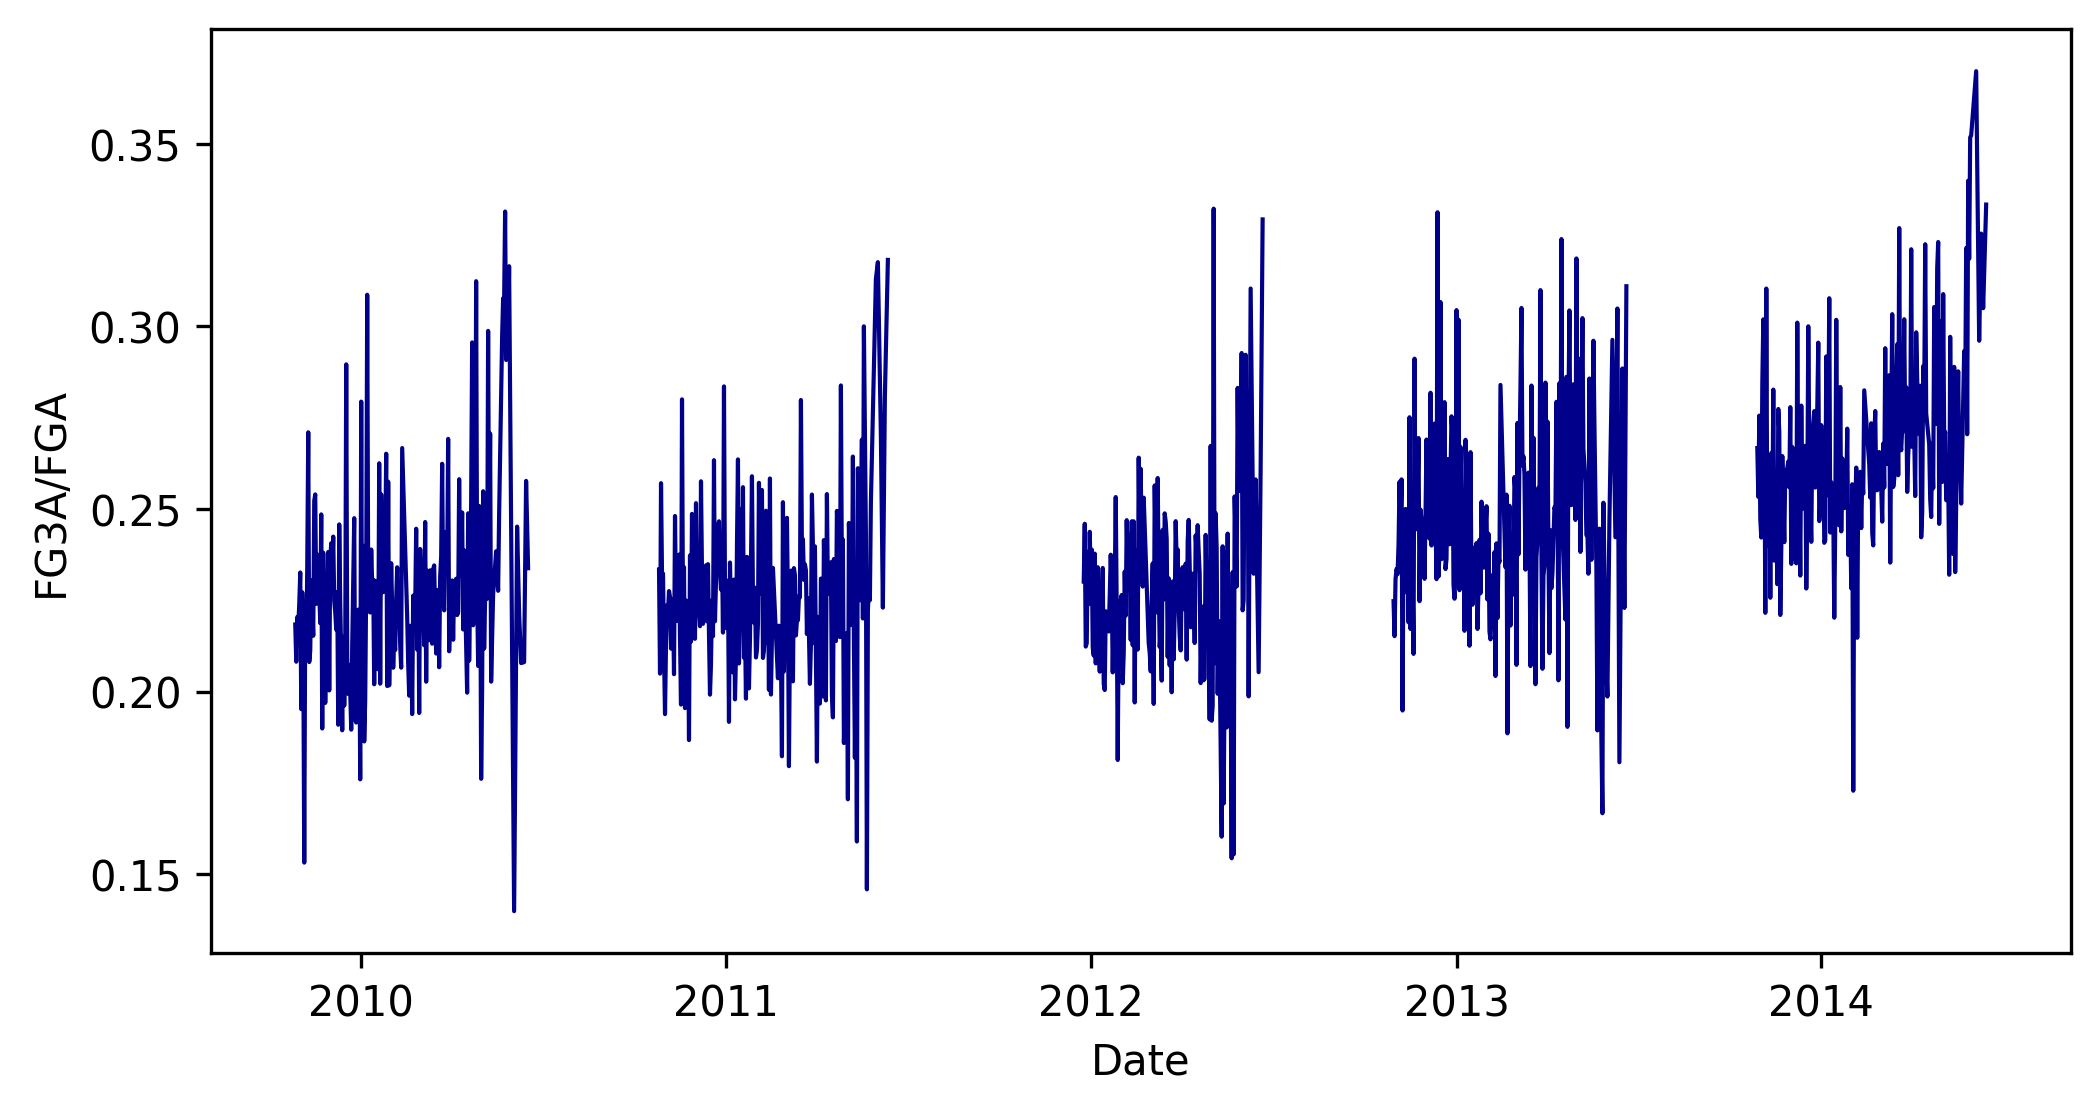

In [18]:
plt.figure(figsize=(8, 4), dpi=300)
for season in sorted(train_df.season.unique()):
    season_df = train_df[train_df.season == season]
    plt.plot(
        season_df.game_date, season_df.league_avg_fg3a_fga,
        color="darkblue", linewidth=1
    )
plt.xlabel("Date")
plt.ylabel("FG3A/FGA")
plt.savefig("plots/training-results.png", dpi=300, bbox_inches="tight")
plt.show()

In [2]:
df = pd.read_csv("modeling/league_avg_fg3a_fga_predictions.csv")
df_lstm = pd.read_csv("modeling/lstm/lstm_test_predictions.csv")
df_cnn = pd.read_csv("modeling/causal_cnn/cnn_test_predictions.csv")

In [3]:
def weighted_mse(true, pred, weights):
    return (weights * (true - pred) ** 2).sum() / weights.sum()

weighted_mse(df.league_avg_fg3a_fga, df.league_avg_fg3a_fga.mean(), df_cnn.fga)

0.001372641630738644

In [4]:
print(mean_squared_error(df.league_avg_fg3a_fga, df.predicted_league_avg_fg3a_fga))
print(r2_score(df.league_avg_fg3a_fga, df.predicted_league_avg_fg3a_fga))
print(weighted_mse(df.league_avg_fg3a_fga, df.predicted_league_avg_fg3a_fga, df_lstm.fga))

0.0009625766473421483
0.4593597363423908
0.0006291562388663707


0.0011774107653244046
0.33742774853083335
[[1.         0.60496675]
 [0.60496675 1.        ]]


0.0007346204565743974

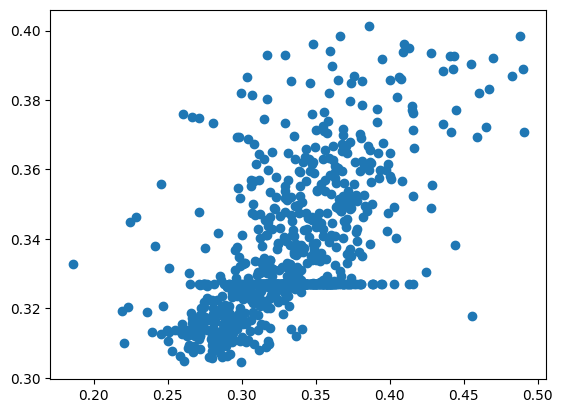

In [11]:
plt.scatter(df_lstm.league_avg_fg3a_fga[4:], df_lstm.Predictions[:-4])
print(mean_squared_error(np.array(df_lstm.league_avg_fg3a_fga.iloc[4:]), np.array(df_lstm.Predictions[:-4])))
print(r2_score(df_lstm.league_avg_fg3a_fga.iloc[4:], df_lstm.Predictions[:-4]))
print(np.corrcoef(df_lstm.league_avg_fg3a_fga.iloc[4:], df_lstm.Predictions[:-4]))
weighted_mse(df_lstm.league_avg_fg3a_fga.iloc[4:],df_lstm.Predictions[:-4], df_lstm.fga.iloc[4:])

0.0012271944240923784
0.30941265656148065
[[1.        0.6557015]
 [0.6557015 1.       ]]
0.000449374091007161


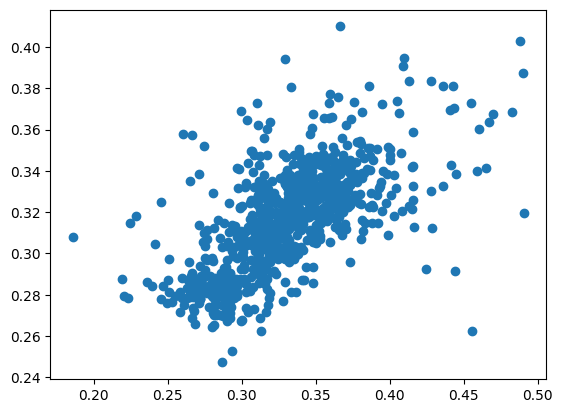

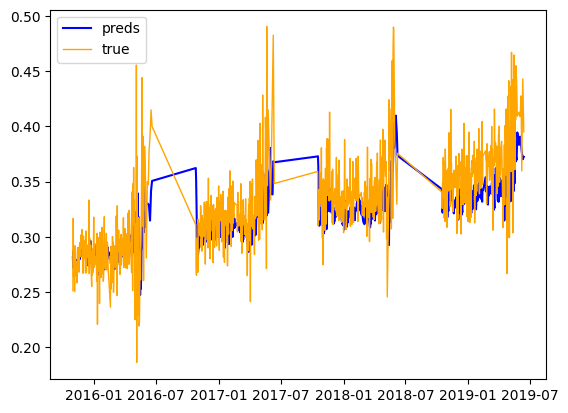

In [39]:
plt.scatter(df_cnn.league_avg_fg3a_fga[4:], df_cnn.Predictions[:-4])
print(mean_squared_error(df_cnn.league_avg_fg3a_fga.iloc[4:], df_cnn.Predictions[:-4]))
print(r2_score(df_cnn.league_avg_fg3a_fga.iloc[4:], df_cnn.Predictions[:-4]))
print(np.corrcoef(df_cnn.league_avg_fg3a_fga.iloc[4:], df_cnn.Predictions[:-4]))
print(weighted_mse(df_cnn.league_avg_fg3a_fga.iloc[4:],
             df_cnn.Predictions[:-4],
              df_cnn.fga.iloc[4:]
            ))
plt.show()
plt.plot(pd.to_datetime(df.game_date.iloc[3:]), df_cnn.Predictions.iloc[:-4], color="blue", label="preds")
plt.plot(pd.to_datetime(df.game_date.iloc[3:]), df.league_avg_fg3a_fga.iloc[3:], color='orange', label="true", linewidth=1)
plt.legend()
plt.show()

In [56]:
preds = df_cnn.Predictions.iloc[:-4].reset_index(drop=True)
dates = pd.to_datetime(df.game_date.iloc[3:].reset_index(drop=True))
true = df_cnn.league_avg_fg3a_fga.iloc[4:].reset_index(drop=True)
weights = df_cnn.fga.iloc[4:].reset_index(drop=True)

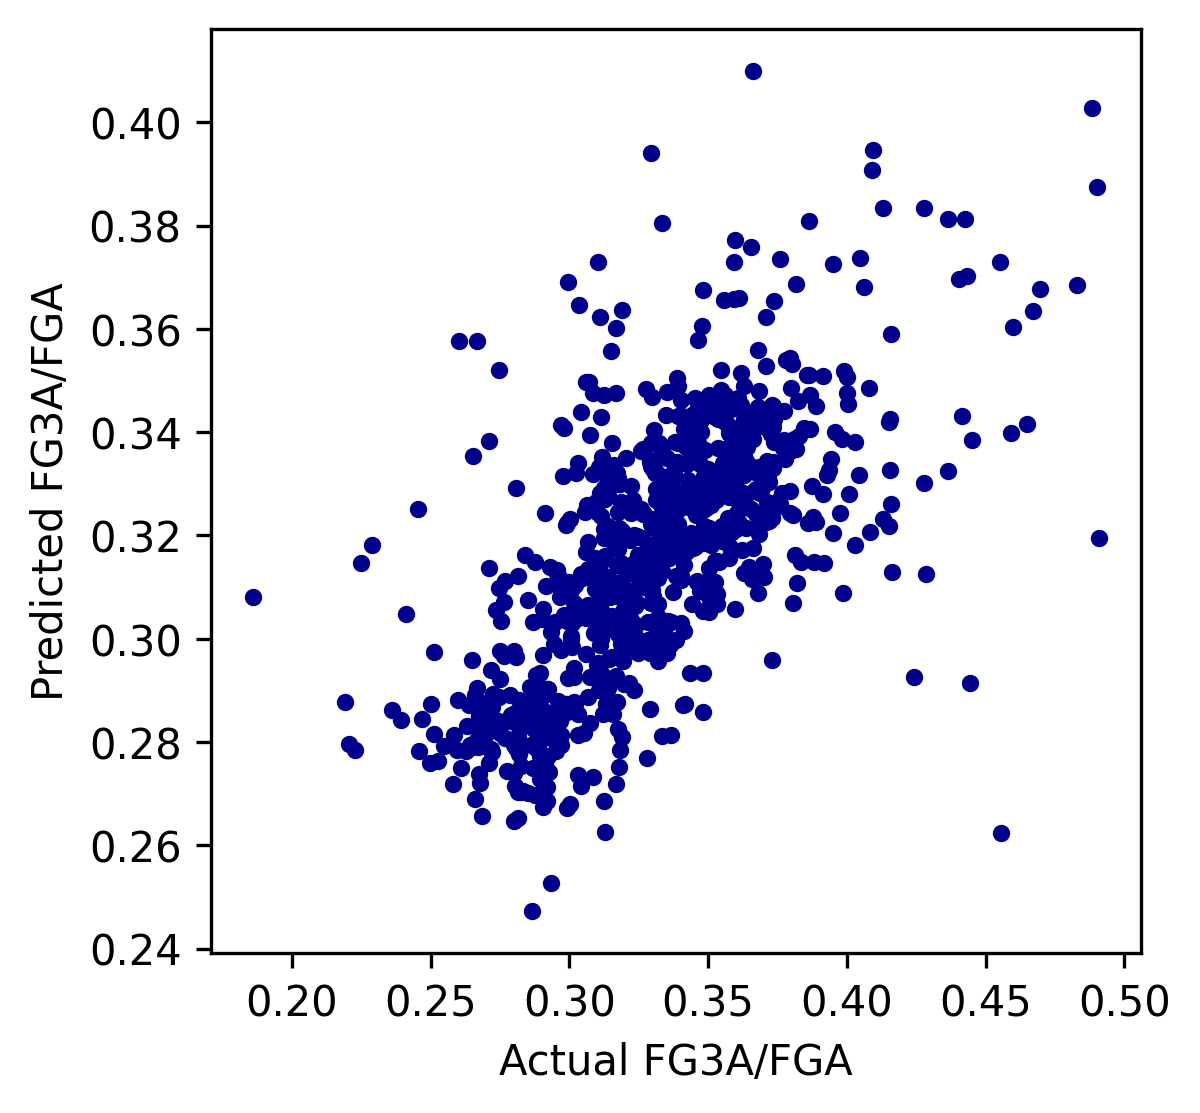

In [81]:
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(true, preds, s=10, color="darkblue")
plt.xlabel("Actual FG3A/FGA")
plt.ylabel("Predicted FG3A/FGA")
plt.savefig("preds-actual.png", dpi=300, bbox_inches="tight")
plt.show()

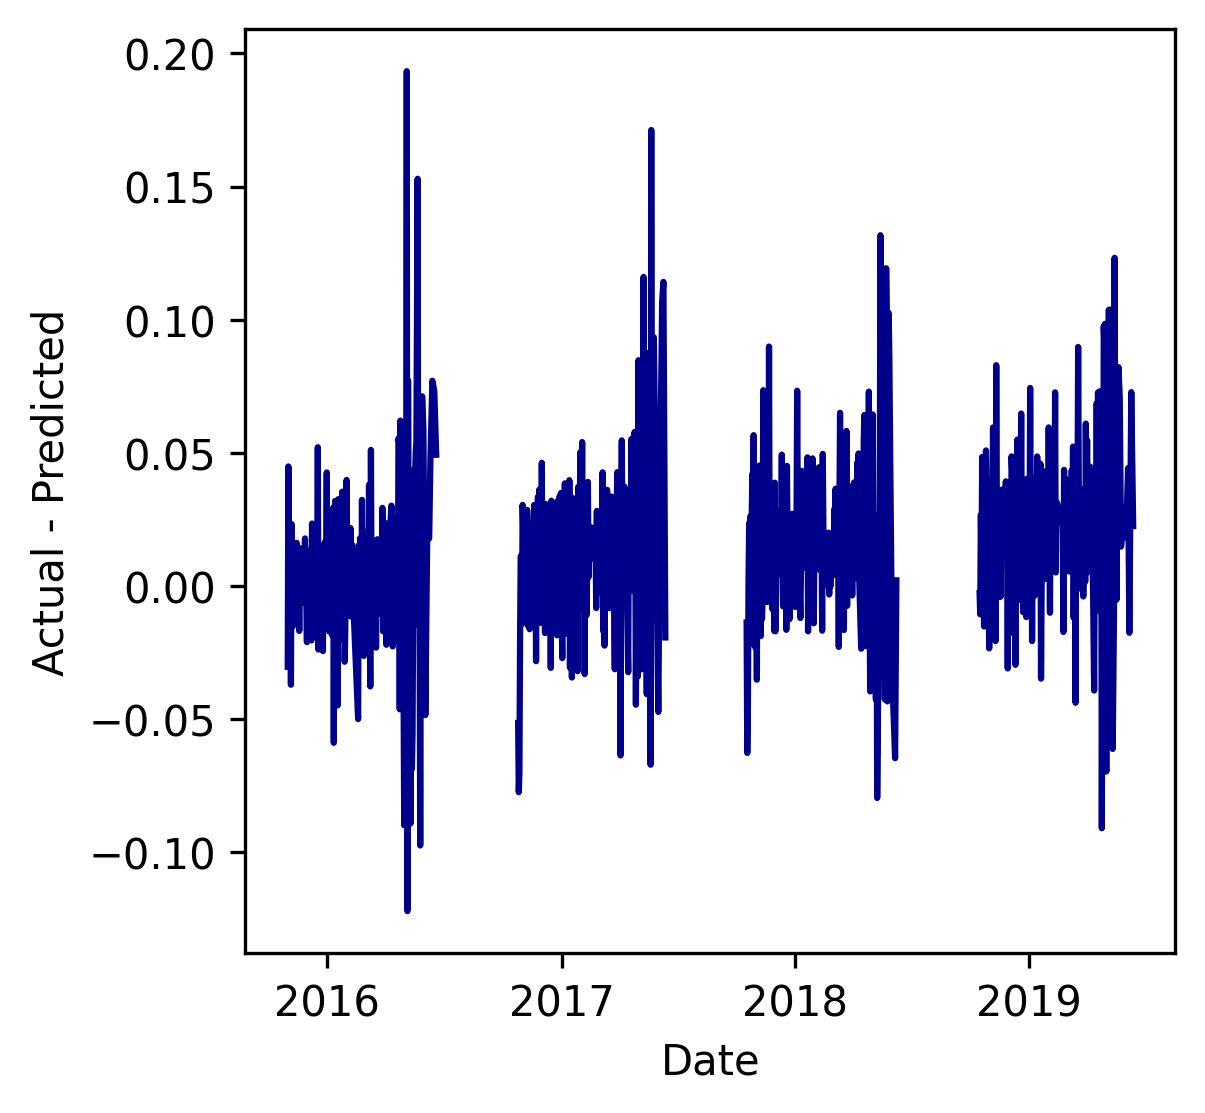

In [83]:
plt.figure(figsize=(4, 4), dpi=300)
plt.plot(dates[dates < "2016-08-01"], (true - preds)[dates < "2016-08-01"], color="darkblue")
plt.plot(
    dates[(dates < "2017-08-01") & (dates >= "2016-08-01")],
    (true - preds)[(dates < "2017-08-01") & (dates >= "2016-08-01")],
    color="darkblue"
)
plt.plot(
    dates[(dates < "2018-08-01") & (dates >= "2017-08-01")],
    (true - preds)[(dates < "2018-08-01") & (dates >= "2017-08-01")],
    color="darkblue"
)
plt.plot(dates[dates >= "2018-08-01"], (true - preds)[dates >= "2018-08-01"], color="darkblue")
plt.xticks(["2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01"], [*range(2016, 2020)])
plt.xlabel("Date")
plt.ylabel("Actual - Predicted")
plt.savefig("residuals.png", dpi=300, bbox_inches="tight")
plt.show()

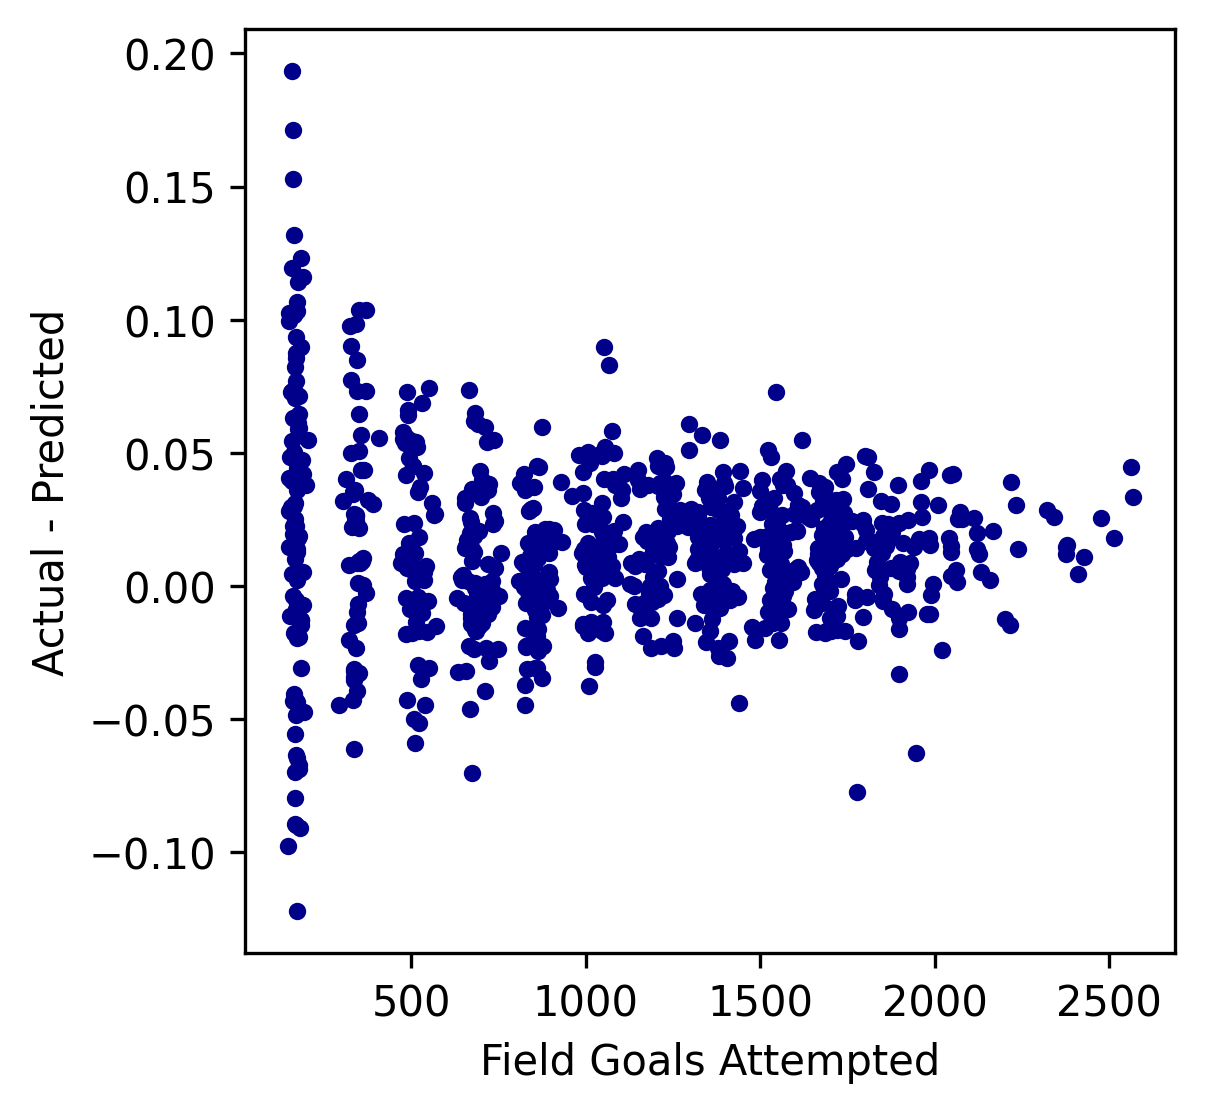

In [82]:
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(weights, true - preds, s = 10, color="darkblue")
plt.xlabel("Field Goals Attempted")
plt.ylabel("Actual - Predicted")
plt.savefig("residuals-weights.png", dpi=300, bbox_inches="tight")

In [60]:
df_bl = pd.read_csv("modeling/Brook Lopez_fg3a_fga_predictions.csv")
print(mean_squared_error(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga']))
r2_score(y_true=df_bl['fg3a_fga'], y_pred=df_bl['predicted_player_fg3a_fga'])

0.03858205382124047


0.09768816979738815

In [84]:
df_bl = pd.read_csv("modeling/Brook Lopez_fg3a_fga_predictions_CNN.csv")
print(mean_squared_error(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga']))
print(r2_score(y_true=df_bl['fg3a_fga'], y_pred=df_bl['predicted_player_fg3a_fga']))
print(weighted_mse(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga'], df_bl.field_goals_attempted))

0.03863449109618111
0.0964618283034453
0.035783703435920425


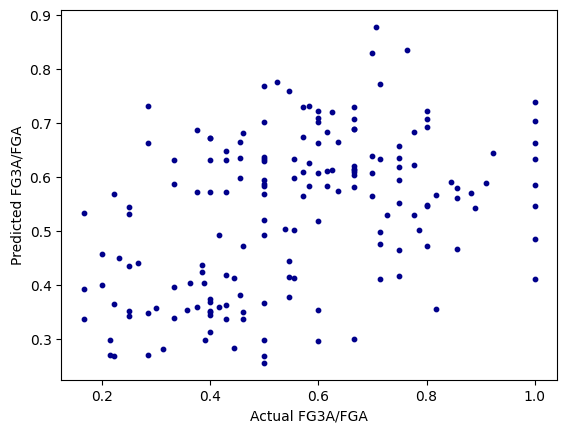

In [89]:
plt.scatter(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga'], s=10, color="darkblue")
plt.xlabel("Actual FG3A/FGA")
plt.ylabel("Predicted FG3A/FGA")
plt.savefig("bl-pred-actual.png", dpi=300, bbox_inches="tight")
plt.show()

In [91]:
np.corrcoef(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga'])

array([[1.        , 0.42393001],
       [0.42393001, 1.        ]])

In [86]:
df_ad = pd.read_csv("modeling/Anthony Davis_fg3a_fga_predictions_CNN.csv")
print(mean_squared_error(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga']))
print(r2_score(y_true=df_ad['fg3a_fga'], y_pred=df_ad['predicted_player_fg3a_fga']))
print(weighted_mse(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga'], df_ad.field_goals_attempted))

0.006920900640702241
0.05718584790370318
0.006211971295548302


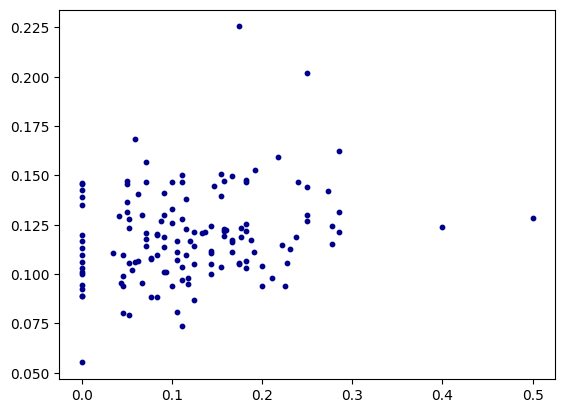

In [87]:
plt.scatter(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga'], s=10, color="darkblue")

In [ ]:
np.corrcoef(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga'])

array([[1.        , 0.24120603],
       [0.24120603, 1.        ]])

In [6]:
df_bl = pd.read_csv("modeling/Brook Lopez_fg3a_fga_predictions.csv")
print(mean_squared_error(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga']))
print(r2_score(y_true=df_bl['fg3a_fga'], y_pred=df_bl['predicted_player_fg3a_fga']))
print(weighted_mse(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga'], df_bl.field_goals_attempted))

0.038556145027120854
0.09829409429142177
0.03587847456423455


In [7]:
print(weighted_mse(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga'].mean(), df_bl.field_goals_attempted))

0.04176050015151679


In [20]:
df_ad = pd.read_csv("modeling/Anthony Davis_fg3a_fga_predictions_Prophet.csv")
print(mean_squared_error(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga']))
print(r2_score(y_true=df_ad['fg3a_fga'], y_pred=df_ad['predicted_player_fg3a_fga']))
print(weighted_mse(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga'], df_ad.field_goals_attempted))

0.006936955153727832
0.05499878831834748
0.006210955868170005


In [17]:
df_ad = pd.read_csv("modeling/Anthony Davis_fg3a_fga_predictions.csv")
print(mean_squared_error(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga']))
print(r2_score(y_true=df_ad['fg3a_fga'], y_pred=df_ad['predicted_player_fg3a_fga']))
print(weighted_mse(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga'], df_ad.field_goals_attempted))

0.007024846269146612
0.043025637458036003
0.0062887239950952965


In [91]:
print(weighted_mse(df_ad['fg3a_fga'], df_ad['fg3a_fga'].mean(), df_ad.field_goals_attempted))

0.006518105668644251
